In [91]:
import os, numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import ImagingReso._utilities as reso_util
import numpy as np
from ImagingReso.resonance import Resonance

In [2]:
%matplotlib notebook

In [119]:
dfh = pd.read_csv('./H-1.csv')
dfh

,E_eV,Sig_b
0,1.000000e-05,1177.260000
1,1.031250e-05,1159.290000
2,1.062500e-05,1142.120000
3,1.093750e-05,1125.690000
4,1.125000e-05,1109.950000
...,...,...
626,1.800000e+07,0.536733
627,1.850000e+07,0.522008
628,1.900000e+07,0.507987
629,1.950000e+07,0.494622


In [63]:
a = 3956*np.sqrt(1000/81.787)

In [68]:
def m_per_s_to_ev(m_per_s):
    ev =  pow(m_per_s/a, 2)
    return ev

In [125]:
df = pd.read_csv('./H_cross_sections.csv')
# print(df.head())
header_list = list(df)
x_list = []
y_list = []
for each in header_list:
    if 'us/m' in each:
        df[each] = m_per_s_to_ev((1/df[each])*1e6)
        df[each] = reso_util.ev_to_angstroms(df[each])
        _name = each.split(' ')[1]
        new_name = 'eV {}'.format(_name)
        df.rename(columns={each: new_name}, inplace=True)
        x_list.append(new_name)
    else:
        y_list.append(each)
df

,eV (H2),xs (H2),eV (C4H10),"xs (Butane, C4H10)",eV (C16H34),"xs (Cetane, C16H34)",eV (C4H6),"xs (Butadiene, C4H6)",eV (CH4),"xs (Methane, CH4)",eV (C2H6),"xs (Ethane, C2H6)",eV (C3H8),"xs (Propane, C3H8)",eV (C2H4),"xs (Ethylene, C2H4)"
0,0.000331,20.374085,5.302356,87.103604,5.283152,92.110344,5.078645,81.450804,5.173920,88.910178,5.291197,87.851773,4.921983,84.754355,5.340284,83.215291
1,0.041769,20.444310,5.195508,86.592256,5.187794,91.224274,4.942247,80.942645,5.131489,87.719612,5.207660,86.964428,4.820450,83.570165,5.233171,82.405186
2,0.089117,20.513898,5.082552,85.857478,5.068530,90.041998,4.805716,80.285107,5.077304,86.605010,5.112169,85.928979,4.713073,82.461303,5.090532,81.524218
3,0.136398,20.508797,4.969662,85.197390,4.931469,88.786945,4.603841,79.261137,5.017010,85.266978,5.010636,84.744790,4.605695,81.352440,4.965556,80.566647
4,0.183879,20.727763,4.838843,84.315146,4.806229,87.530617,4.425674,78.309305,4.914881,83.410583,4.903127,83.486548,4.480455,80.096112,4.810831,79.388197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,5.068695,50.228721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,5.169831,50.964775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,5.253104,51.553362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,5.336377,52.141950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>


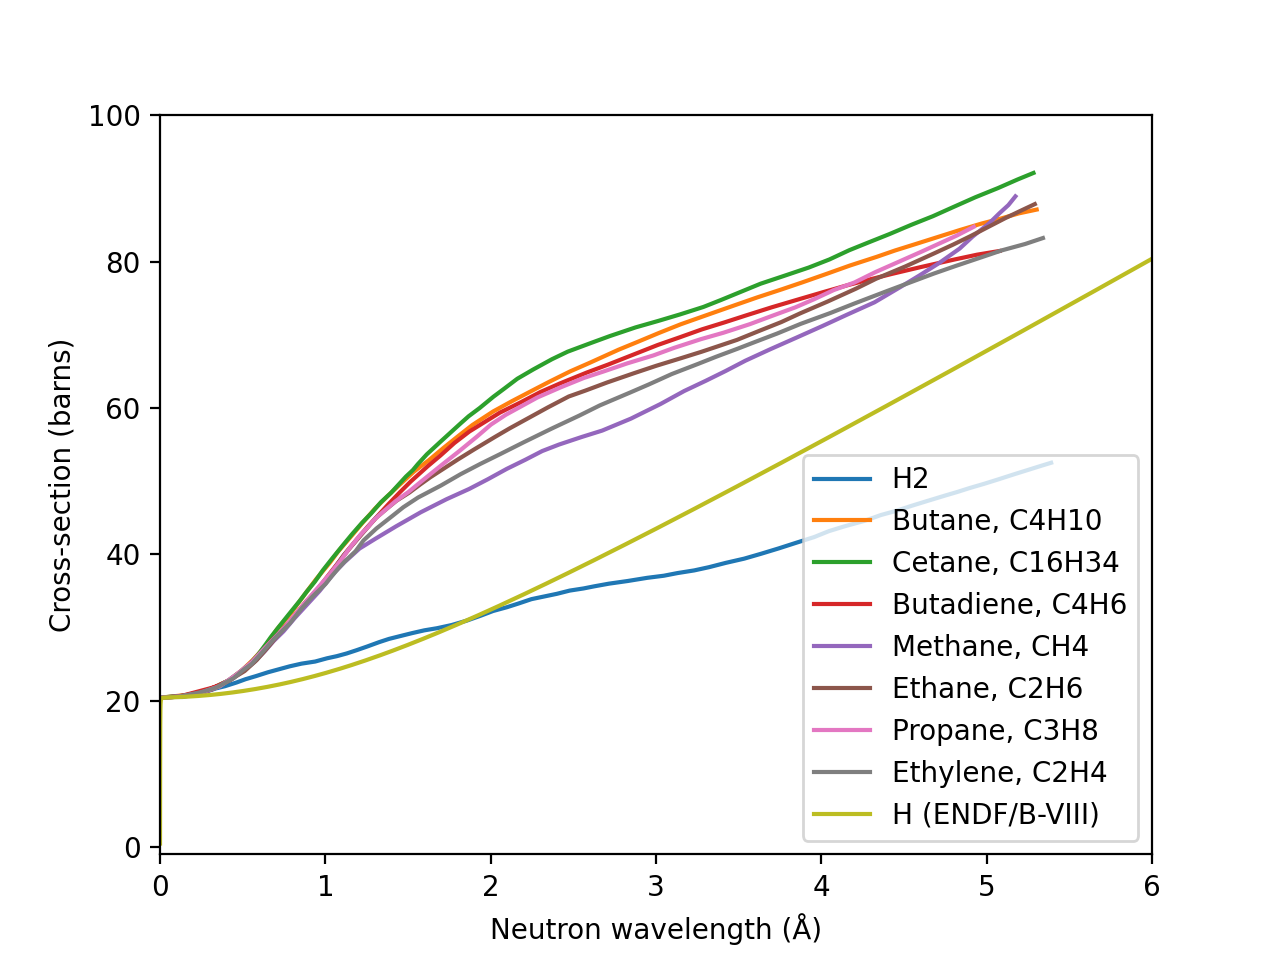

In [157]:
label_list = []
fig_mpl, ax_mpl = plt.subplots()
for i,n in enumerate(x_list):
    _label = y_list[i].split('(')[1][0:-1]
    label_list.append(_label)
    df.plot(x=n, y=y_list[i], ax=ax_mpl, label=_label)
ax_mpl.plot(reso_util.ev_to_angstroms(dfh['E_eV']), dfh['Sig_b'], label='H (ENDF/B-VIII)')
ax_mpl.set_xlim(0, 6)
ax_mpl.set_ylim(-1,100)
ax_mpl.set_ylabel('Cross-section (barns)')
ax_mpl.set_xlabel(u"Neutron wavelength (\u212B)")
ax_mpl.legend()

In [150]:
label_list = ['Hydrogen gas, H2',
 'Butane, C4H10',
 'Cetane, C16H34',
 'Butadiene, C4H6',
 'Methane, CH4',
 'Ethane, C2H6',
 'Propane, C3H8',
 'Ethylene, C2H4']

In [155]:
name_list = []
sym_list = []
h_dict = {}
for each in label_list:
    h_dict[each.split(', ')[1]] = each.split(', ')[0]
    sym_list.append(each.split(', ')[1])
#     name_list.append(each.split(', ')[0])
# print(name_list)
print(sym_list)

['H2', 'C4H10', 'C16H34', 'C4H6', 'CH4', 'C2H6', 'C3H8', 'C2H4']


In [153]:
h_dict

{'H2': 'Hydrogen gas',
 'C4H10': 'Butane',
 'C16H34': 'Cetane',
 'C4H6': 'Butadiene',
 'CH4': 'Methane',
 'C2H6': 'Ethane',
 'C3H8': 'Propane',
 'C2H4': 'Ethylene'}